# Reduccion de dimensiones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

In [2]:
SEED = 42

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
data = pd.read_csv('/Users/gblasd/Documents/DataScience/03_UnsupervisedLearning/data/HeartAttack.csv')
print(data.shape)

(1319, 8)


In [5]:
data.head()

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  troponin
0   64       1       66            160           83    160.0   1.80     0.012
1   21       1       94             98           46    296.0   6.75     1.060
2   55       1       64            160           77    270.0   1.99     0.003
3   64       1       70            120           55    270.0  13.87     0.122
4   55       1       64            112           65    300.0   1.08     0.003

Feature	Description
* age	Edad del paciente.
* gender	Género del paciente, donde 1 podría indicar masculino y 0 femenino (esto es una suposición común).
* impluse	Pulso del paciente.
* pressurehight	Presión arterial sistólica (el número más alto).
* pressurelow	Presión arterial diastólica (el número más bajo).
* glucose	Nivel de glucosa en sangre.
* kcm	Nivel de Creatina Quinasa-MB (CK-MB), un biomarcador utilizado para detectar daño al tejido cardíaco, especialmente útil en el diagnóstico de ataques cardíacos.
* troponin	Nivel de troponina, un biomarcador utilizado para identificar daño al corazón.

# Analisis Exploratorio de Datos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 82.6 KB


In [7]:
data.describe(percentiles=[0.01, 0.25, 0.5, 0.75, .99])

age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
mean     56.191812     0.659591    78.336619     127.170584    72.269143   
std      13.647315     0.474027    51.630270      26.122720    14.033924   
min      14.000000     0.000000    20.000000      42.000000    38.000000   
1%       22.180000     0.000000    51.000000      76.000000    44.000000   
25%      47.000000     0.000000    64.000000     110.000000    62.000000   
50%      58.000000     1.000000    74.000000     124.000000    72.000000   
75%      65.000000     1.000000    85.000000     143.000000    81.000000   
99%      86.000000     1.000000   125.000000     208.000000   106.820000   
max     103.000000     1.000000  1111.000000     223.000000   154.000000   

           glucose          kcm     troponin  
count  1319.000000  1319.000000  1319.000000  
mean    146.634344    15.274306     0.360942  
std      74.923045    46.327083     1.154568  
min      35.000000     0.321000     0.001000  
1%       67.180000     0.518340     0.003000  
25%      98.000000     1.655000     0.006000  
50%     116.000000     2.850000     0.014000  
75%     169.500000     5.805000     0.085500  
99%     420.740000   300.000000     5.984800  
max     541.000000   300.000000    10.300000

In [8]:
# data[data['impluse'] < data['impluse'].quantile(.99)].describe(percentiles=[0.01, 0.25, 0.5, 0.75, .99])
data = data[data['impluse'] < data['impluse'].quantile(.99)]

In [9]:
print(data.shape)

(1303, 8)


In [10]:
# valores faltantes
data.isna().sum() / data.shape[0]

age              0.0
gender           0.0
impluse          0.0
pressurehight    0.0
pressurelow      0.0
glucose          0.0
kcm              0.0
troponin         0.0
dtype: float64

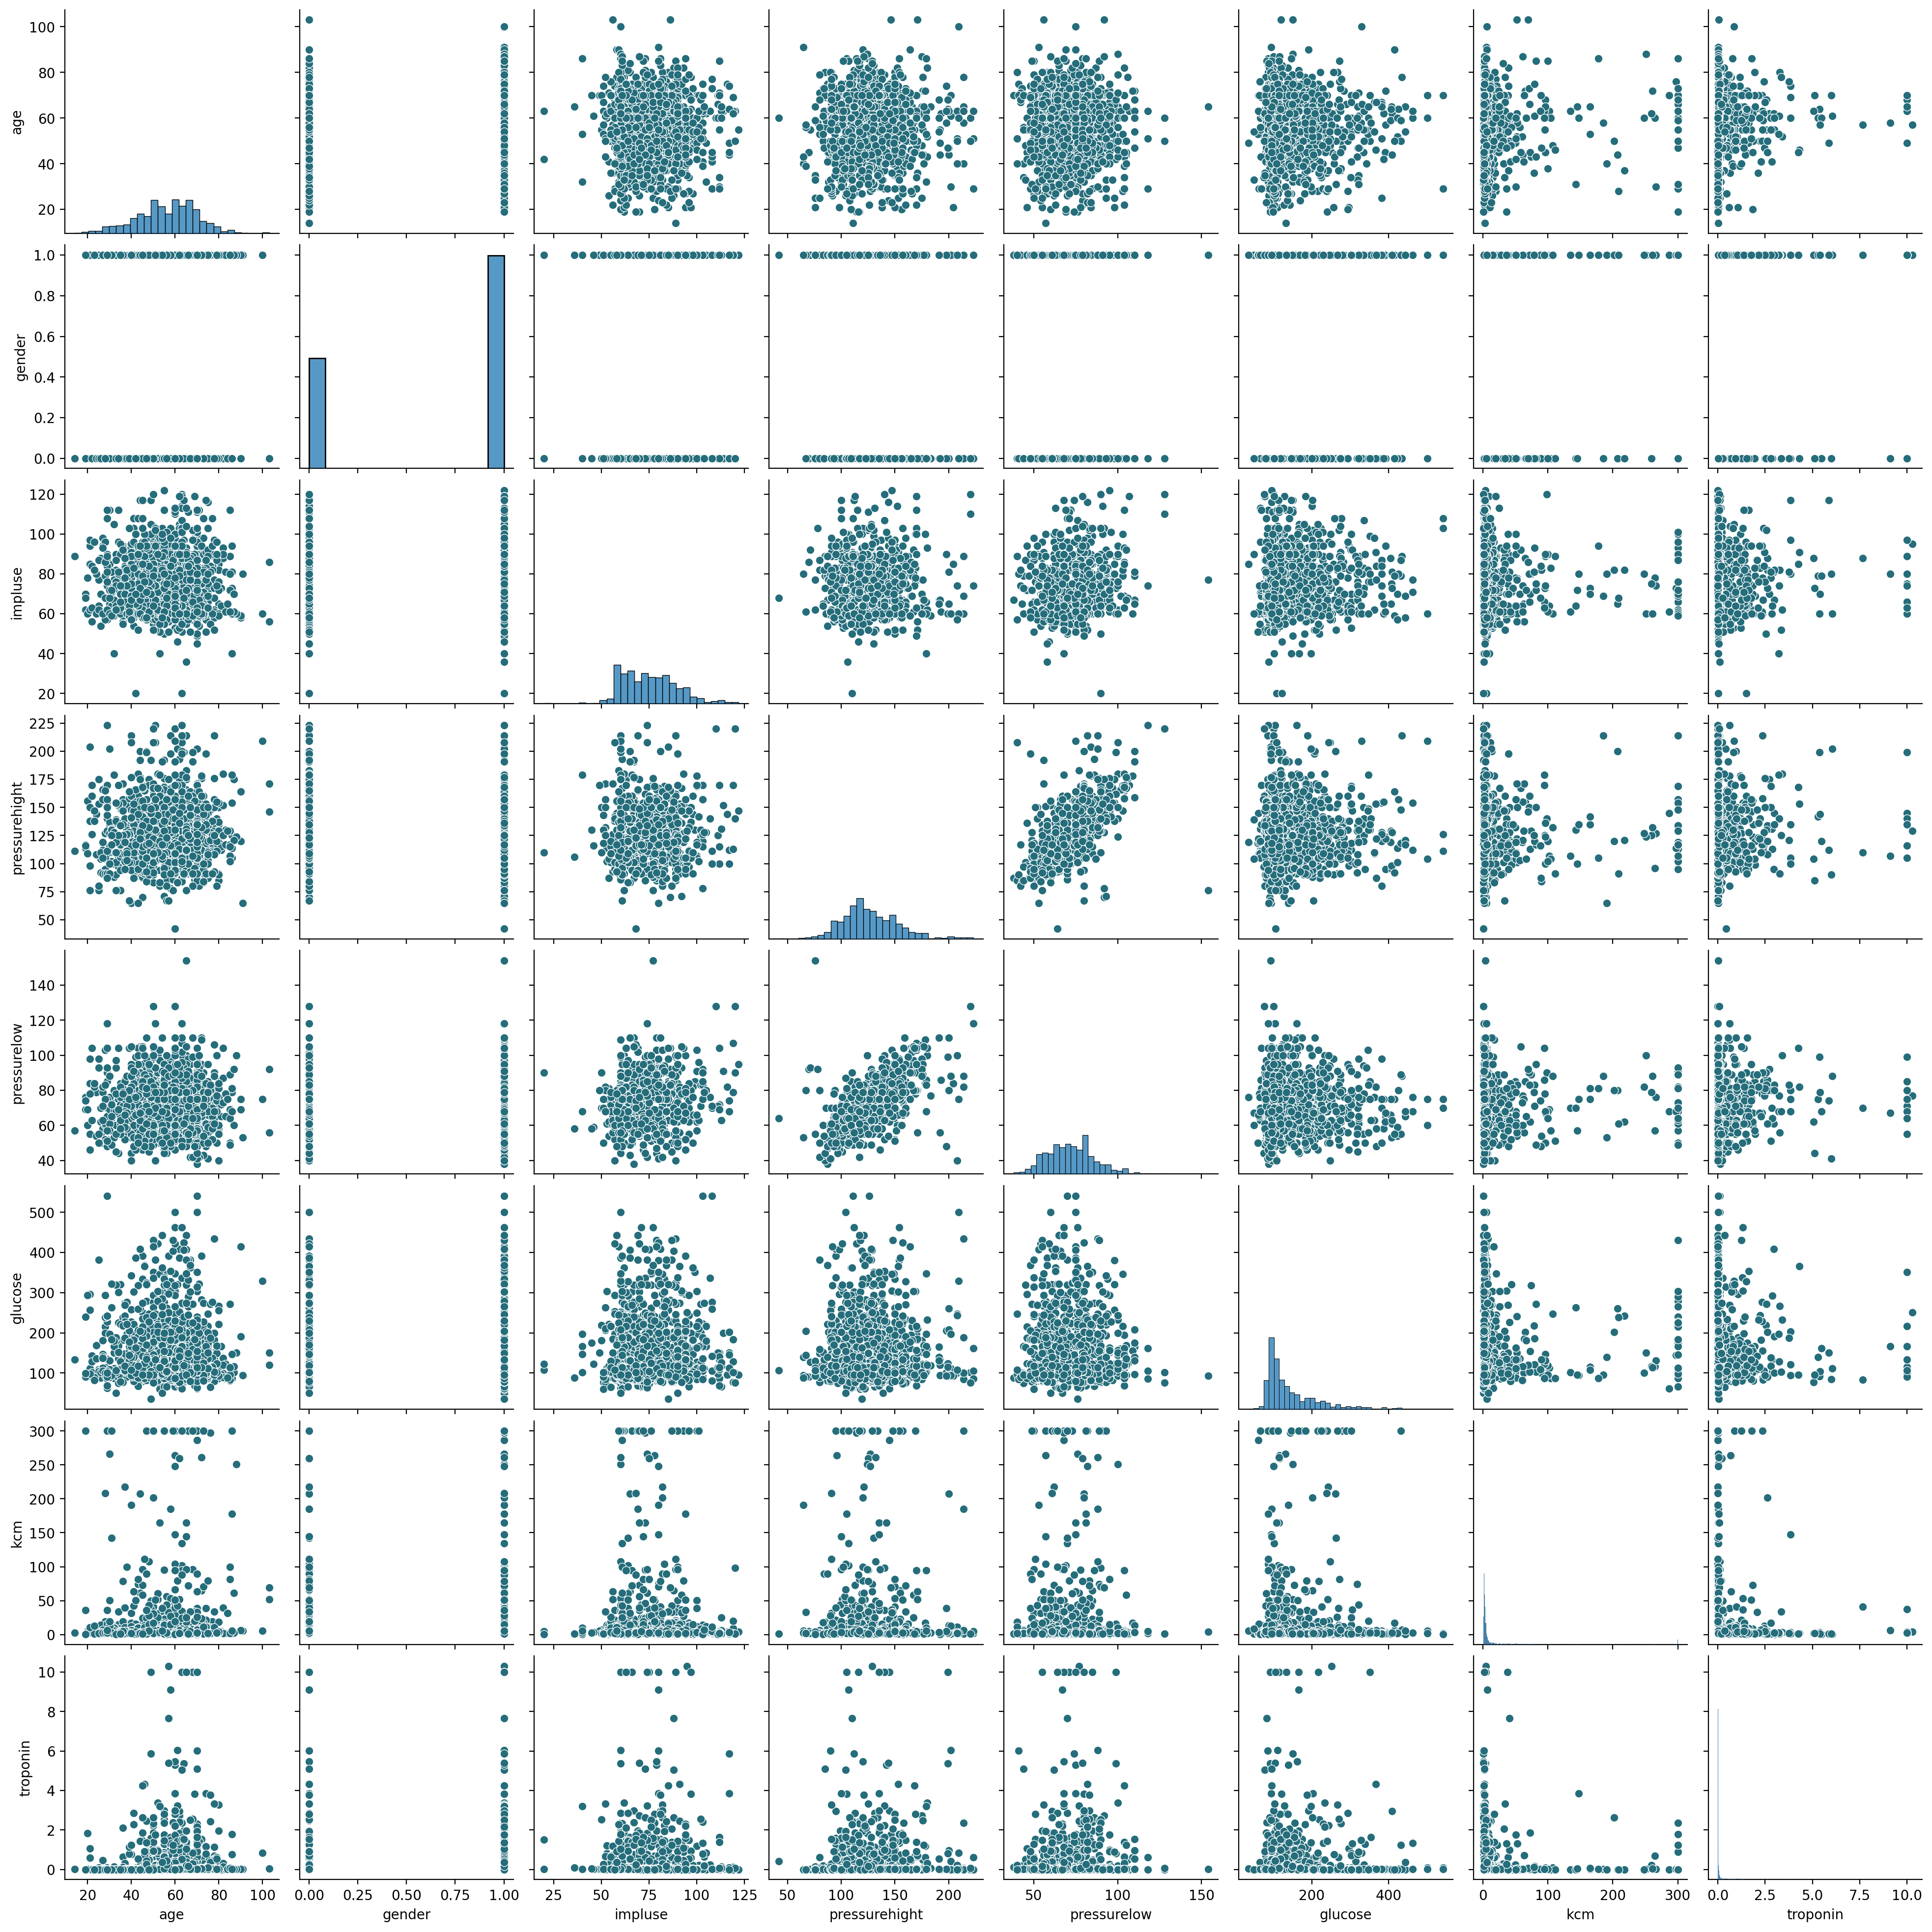

In [11]:
sns.pairplot(data, plot_kws={'color': '#256D7B'})
plt.show()

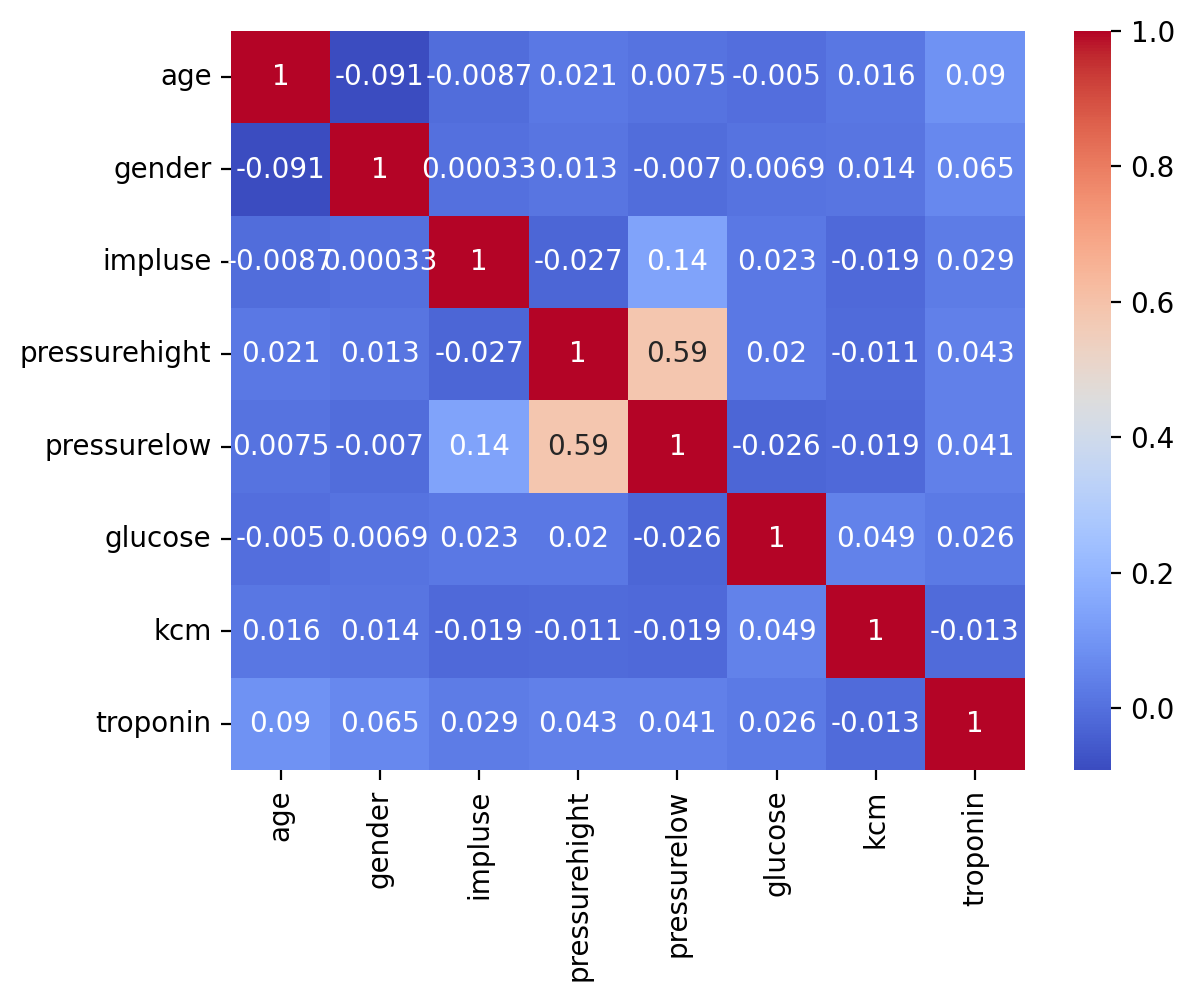

In [12]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

# Estandarizar

In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [14]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = [ 'ss_' + x for x in data.columns.to_list()]
data_scaled.head()

ss_age  ss_gender  ss_impluse  ss_pressurehight  ss_pressurelow  \
0  0.574898   0.720172   -0.659096          1.249002        0.764077   
1 -2.581802   0.720172    1.297172         -1.117809       -1.870518   
2 -0.085807   0.720172   -0.798829          1.249002        0.336845   
3  0.574898   0.720172   -0.379629         -0.277973       -1.229670   
4 -0.085807   0.720172   -0.798829         -0.583368       -0.517618   

   ss_glucose    ss_kcm  ss_troponin  
0    0.173196 -0.289397    -0.302130  
1    1.981645 -0.181892     0.618067  
2    1.635912 -0.285271    -0.310032  
3    1.635912 -0.027258    -0.205544  
4    2.034835 -0.305034    -0.310032

In [15]:
columns = data.columns.to_list()
columns

['age',
 'gender',
 'impluse',
 'pressurehight',
 'pressurelow',
 'glucose',
 'kcm',
 'troponin']

In [16]:
print(data_scaled.shape)
print(data.shape)

(1303, 8)
(1303, 8)


In [17]:
data = data.join(data_scaled)
data.head()

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  troponin  \
0   64       1       66            160           83    160.0   1.80     0.012   
1   21       1       94             98           46    296.0   6.75     1.060   
2   55       1       64            160           77    270.0   1.99     0.003   
3   64       1       70            120           55    270.0  13.87     0.122   
4   55       1       64            112           65    300.0   1.08     0.003   

     ss_age  ss_gender  ss_impluse  ss_pressurehight  ss_pressurelow  \
0  0.574898   0.720172   -0.659096          1.249002        0.764077   
1 -2.581802   0.720172    1.297172         -1.117809       -1.870518   
2 -0.085807   0.720172   -0.798829          1.249002        0.336845   
3  0.574898   0.720172   -0.379629         -0.277973       -1.229670   
4 -0.085807   0.720172   -0.798829         -0.583368       -0.517618   

   ss_glucose    ss_kcm  ss_troponin  
0    0.173196 -0.289397    -0.302130  
1    1.981645 -0.181892     0.618067  
2    1.635912 -0.285271    -0.310032  
3    1.635912 -0.027258    -0.205544  
4    2.034835 -0.305034    -0.310032

In [18]:
data.dropna(inplace=True)

In [19]:
data.shape

(1287, 16)

In [20]:
data.head()

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  troponin  \
0   64       1       66            160           83    160.0   1.80     0.012   
1   21       1       94             98           46    296.0   6.75     1.060   
2   55       1       64            160           77    270.0   1.99     0.003   
3   64       1       70            120           55    270.0  13.87     0.122   
4   55       1       64            112           65    300.0   1.08     0.003   

     ss_age  ss_gender  ss_impluse  ss_pressurehight  ss_pressurelow  \
0  0.574898   0.720172   -0.659096          1.249002        0.764077   
1 -2.581802   0.720172    1.297172         -1.117809       -1.870518   
2 -0.085807   0.720172   -0.798829          1.249002        0.336845   
3  0.574898   0.720172   -0.379629         -0.277973       -1.229670   
4 -0.085807   0.720172   -0.798829         -0.583368       -0.517618   

   ss_glucose    ss_kcm  ss_troponin  
0    0.173196 -0.289397    -0.302130  
1    1.981645 -0.181892     0.618067  
2    1.635912 -0.285271    -0.310032  
3    1.635912 -0.027258    -0.205544  
4    2.034835 -0.305034    -0.310032

In [21]:
ss_columns = [ x for x in data.columns.to_list() if x not in columns ]
ss_columns

['ss_age',
 'ss_gender',
 'ss_impluse',
 'ss_pressurehight',
 'ss_pressurelow',
 'ss_glucose',
 'ss_kcm',
 'ss_troponin']

# MDS

MDS intenta preservar las distancias entre puntos del espacio original, pero representándolos en menos dimensiones (por ejemplo, en 2D). A diferencia de PCA, que busca varianza, MDS trata de mantener la estructura de similitudes.

In [22]:
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=SEED)
X_mds = mds.fit_transform(data[ss_columns])

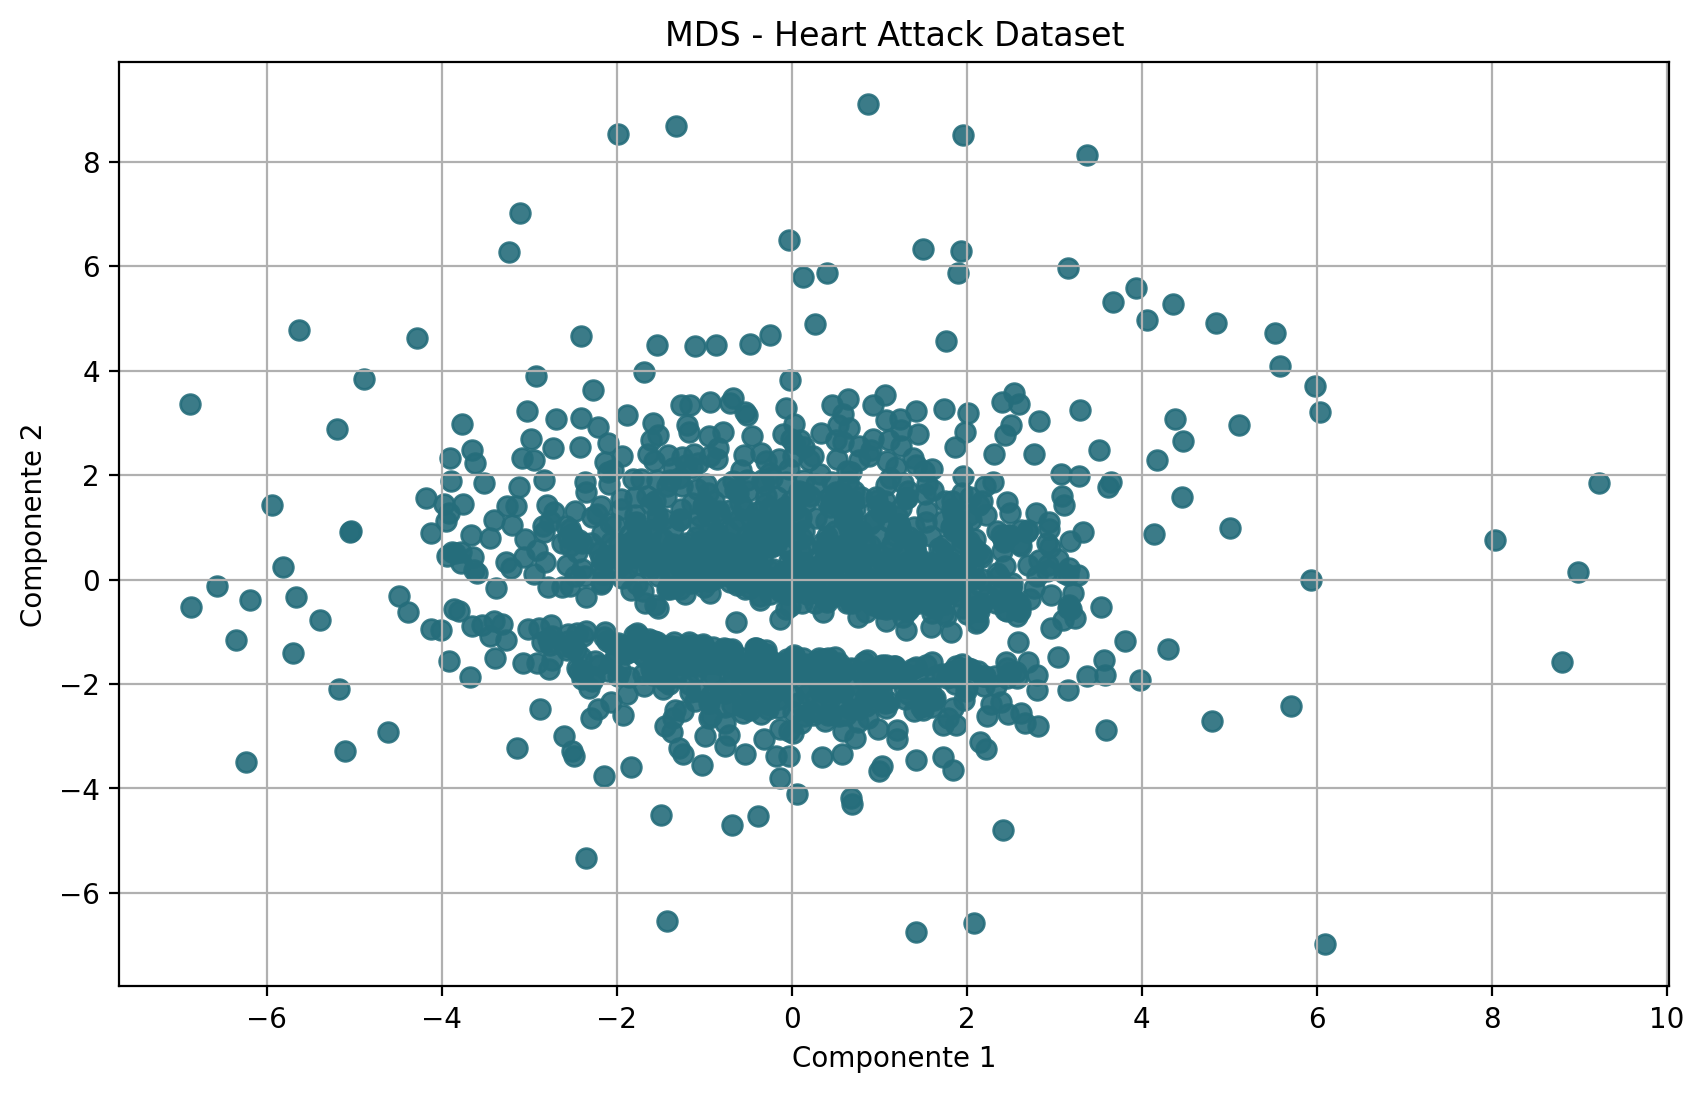

In [23]:
plt.figure(figsize=(10, 6))
#plt.scatter(X_mds[:, 0], X_mds[:, 1], edgecolor='k', s=60, alpha=0.7)
plt.scatter(X_mds[:, 0], X_mds[:, 1], s=50, alpha=0.9, color='#256D7B')
plt.title("MDS - Heart Attack Dataset")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()

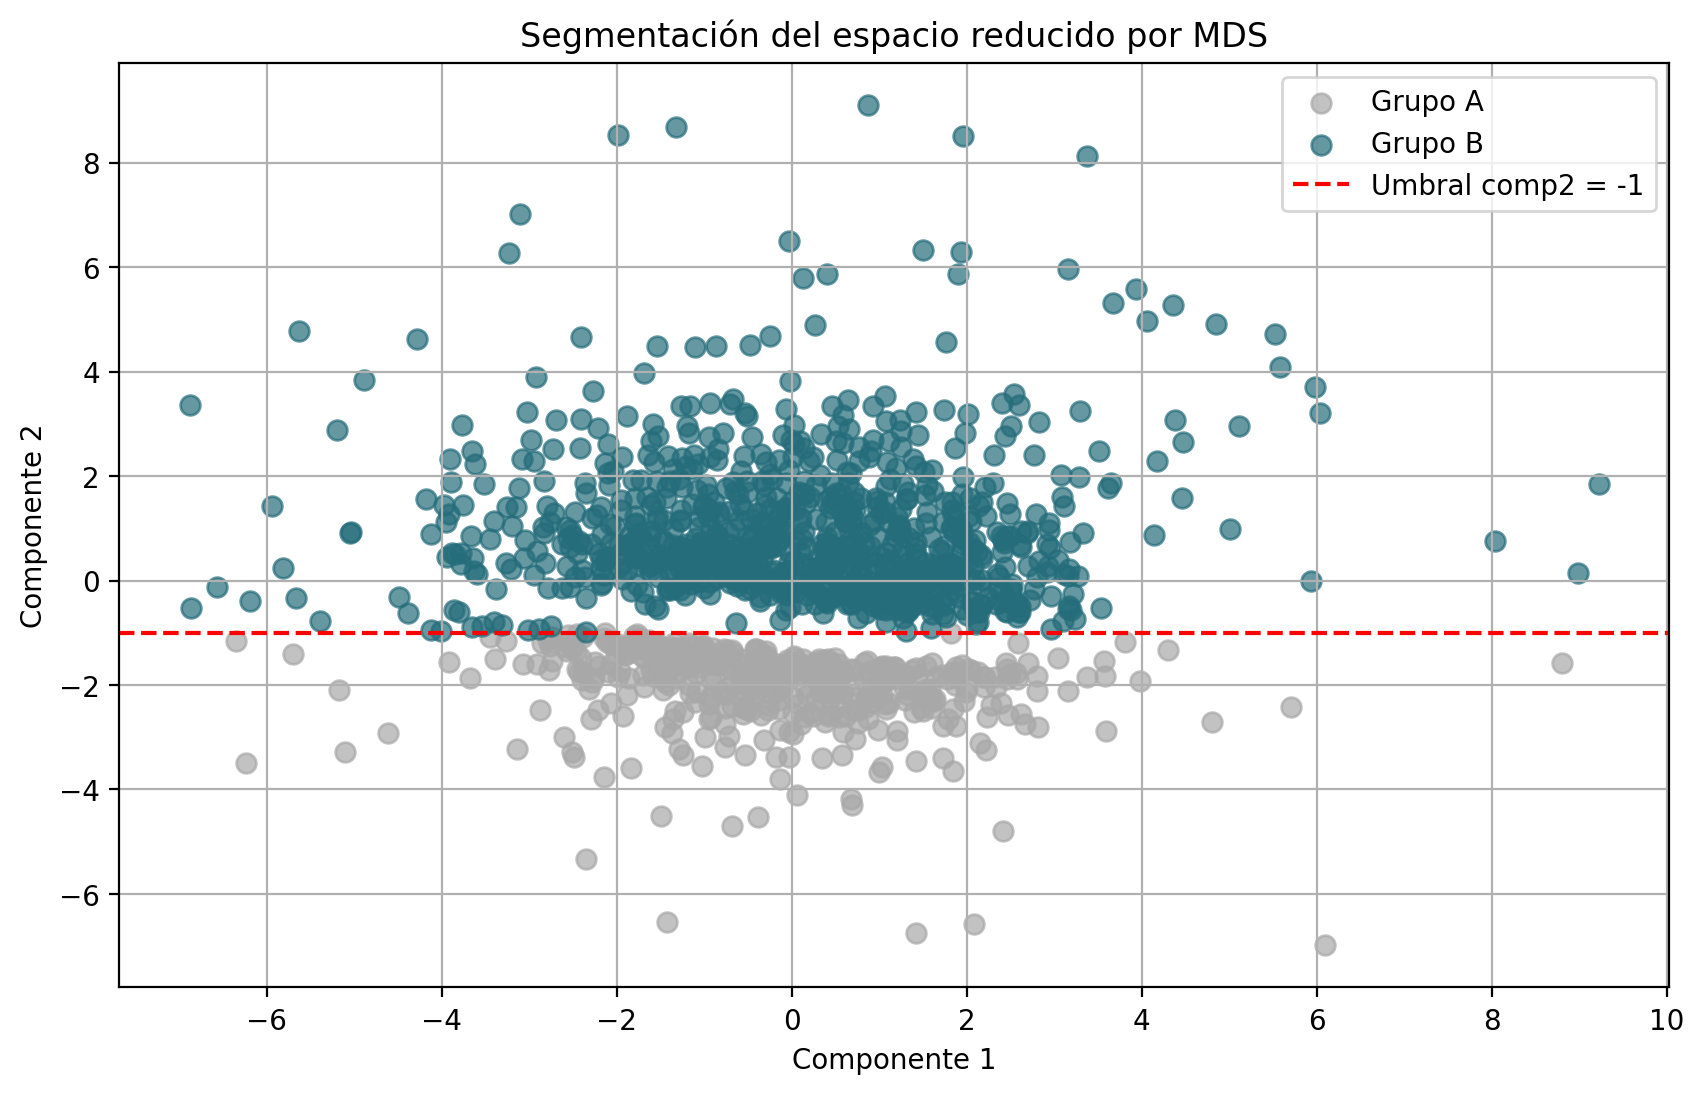

In [24]:
mds_df = pd.DataFrame(X_mds, columns=['comp1', 'comp2'])

umbral = -1

# Segmentación con umbral en comp2 = umbral
mds_df['grupo'] = np.where(mds_df['comp2'] <= umbral, 'Grupo A', 'Grupo B')

# Visualización
plt.figure(figsize=(10, 6))
for grupo, color in zip(['Grupo A', 'Grupo B'], ["#A8A8A8", '#256D7B']):
    subset = mds_df[mds_df['grupo'] == grupo]
    plt.scatter(subset['comp1'], subset['comp2'], label=grupo, alpha=0.7, s=50, color=color)

plt.axhline(y=umbral, color='red', linestyle='--', label='Umbral comp2 = -1')
plt.title("Segmentación del espacio reducido por MDS")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
mds_df

comp1     comp2    grupo
0    -1.622491  0.182173  Grupo B
1     3.513378  2.485057  Grupo B
2    -1.568859  1.509334  Grupo B
3     1.932382  0.991198  Grupo B
4     1.827860  1.495541  Grupo B
...        ...       ...      ...
1282  0.557765  1.666241  Grupo B
1283  1.049726  0.296223  Grupo B
1284 -3.768596  2.968456  Grupo B
1285  2.595240  3.366135  Grupo B
1286 -1.538962  1.911291  Grupo B

[1287 rows x 3 columns]

In [26]:
data = data.join(mds_df)
data.dropna()

age  gender  impluse  pressurehight  pressurelow  glucose     kcm  \
0      64       1       66            160           83    160.0   1.800   
1      21       1       94             98           46    296.0   6.750   
2      55       1       64            160           77    270.0   1.990   
3      64       1       70            120           55    270.0  13.870   
4      55       1       64            112           65    300.0   1.080   
...   ...     ...      ...            ...          ...      ...     ...   
1282   67       0       51            143           75    102.0   1.310   
1283   36       1       92            147           78     77.0   4.580   
1284   29       1       81            150           51    100.0   6.480   
1285   50       0      120            220          128     76.0   0.929   
1286   35       1       74            134           58     78.0   1.370   

      troponin    ss_age  ss_gender  ss_impluse  ss_pressurehight  \
0        0.012  0.574898   0.720172   -0.659096          1.249002   
1        1.060 -2.581802   0.720172    1.297172         -1.117809   
2        0.003 -0.085807   0.720172   -0.798829          1.249002   
3        0.122  0.574898   0.720172   -0.379629         -0.277973   
4        0.003 -0.085807   0.720172   -0.798829         -0.583368   
...        ...       ...        ...         ...               ...   
1282     0.030  0.795133  -1.388557    0.388905          0.867259   
1283     0.004  0.428075   0.720172    1.017705          0.332817   
1284     0.003 -0.966746   0.720172    1.017705         -1.232332   
1285     0.072 -0.673100  -1.388557   -1.218029         -1.308681   
1286     0.003 -1.186981   0.720172   -1.287896          3.081372   

      ss_pressurelow  ss_glucose    ss_kcm  ss_troponin     comp1     comp2  \
0           0.764077    0.173196 -0.289397    -0.302130 -1.622491  0.182173   
1          -1.870518    1.981645 -0.181892     0.618067  3.513378  2.485057   
2           0.336845    1.635912 -0.285271    -0.310032 -1.568859  1.509334   
3          -1.229670    1.635912 -0.027258    -0.205544  1.932382  0.991198   
4          -0.517618    2.034835 -0.305034    -0.310032  1.827860  1.495541   
...              ...         ...       ...          ...       ...       ...   
1282        0.194435   -0.890598 -0.224242    -0.304764  0.557765  1.666241   
1283       -0.304002   -0.079455 -0.288746    -0.300373  1.049726  0.296223   
1284       -1.585697   -0.385296 -0.299605     0.164993 -3.768596  2.968456   
1285        0.408050    0.306170 -0.302645    -0.252959  2.595240  3.366135   
1286       -2.297749   -0.518270 -0.282665    -0.310032 -1.538962  1.911291   

        grupo  
0     Grupo B  
1     Grupo B  
2     Grupo B  
3     Grupo B  
4     Grupo B  
...       ...  
1282  Grupo B  
1283  Grupo B  
1284  Grupo B  
1285  Grupo B  
1286  Grupo B  

[1271 rows x 19 columns]

In [27]:
data.dropna(inplace=True)

In [28]:
data.shape

(1271, 19)

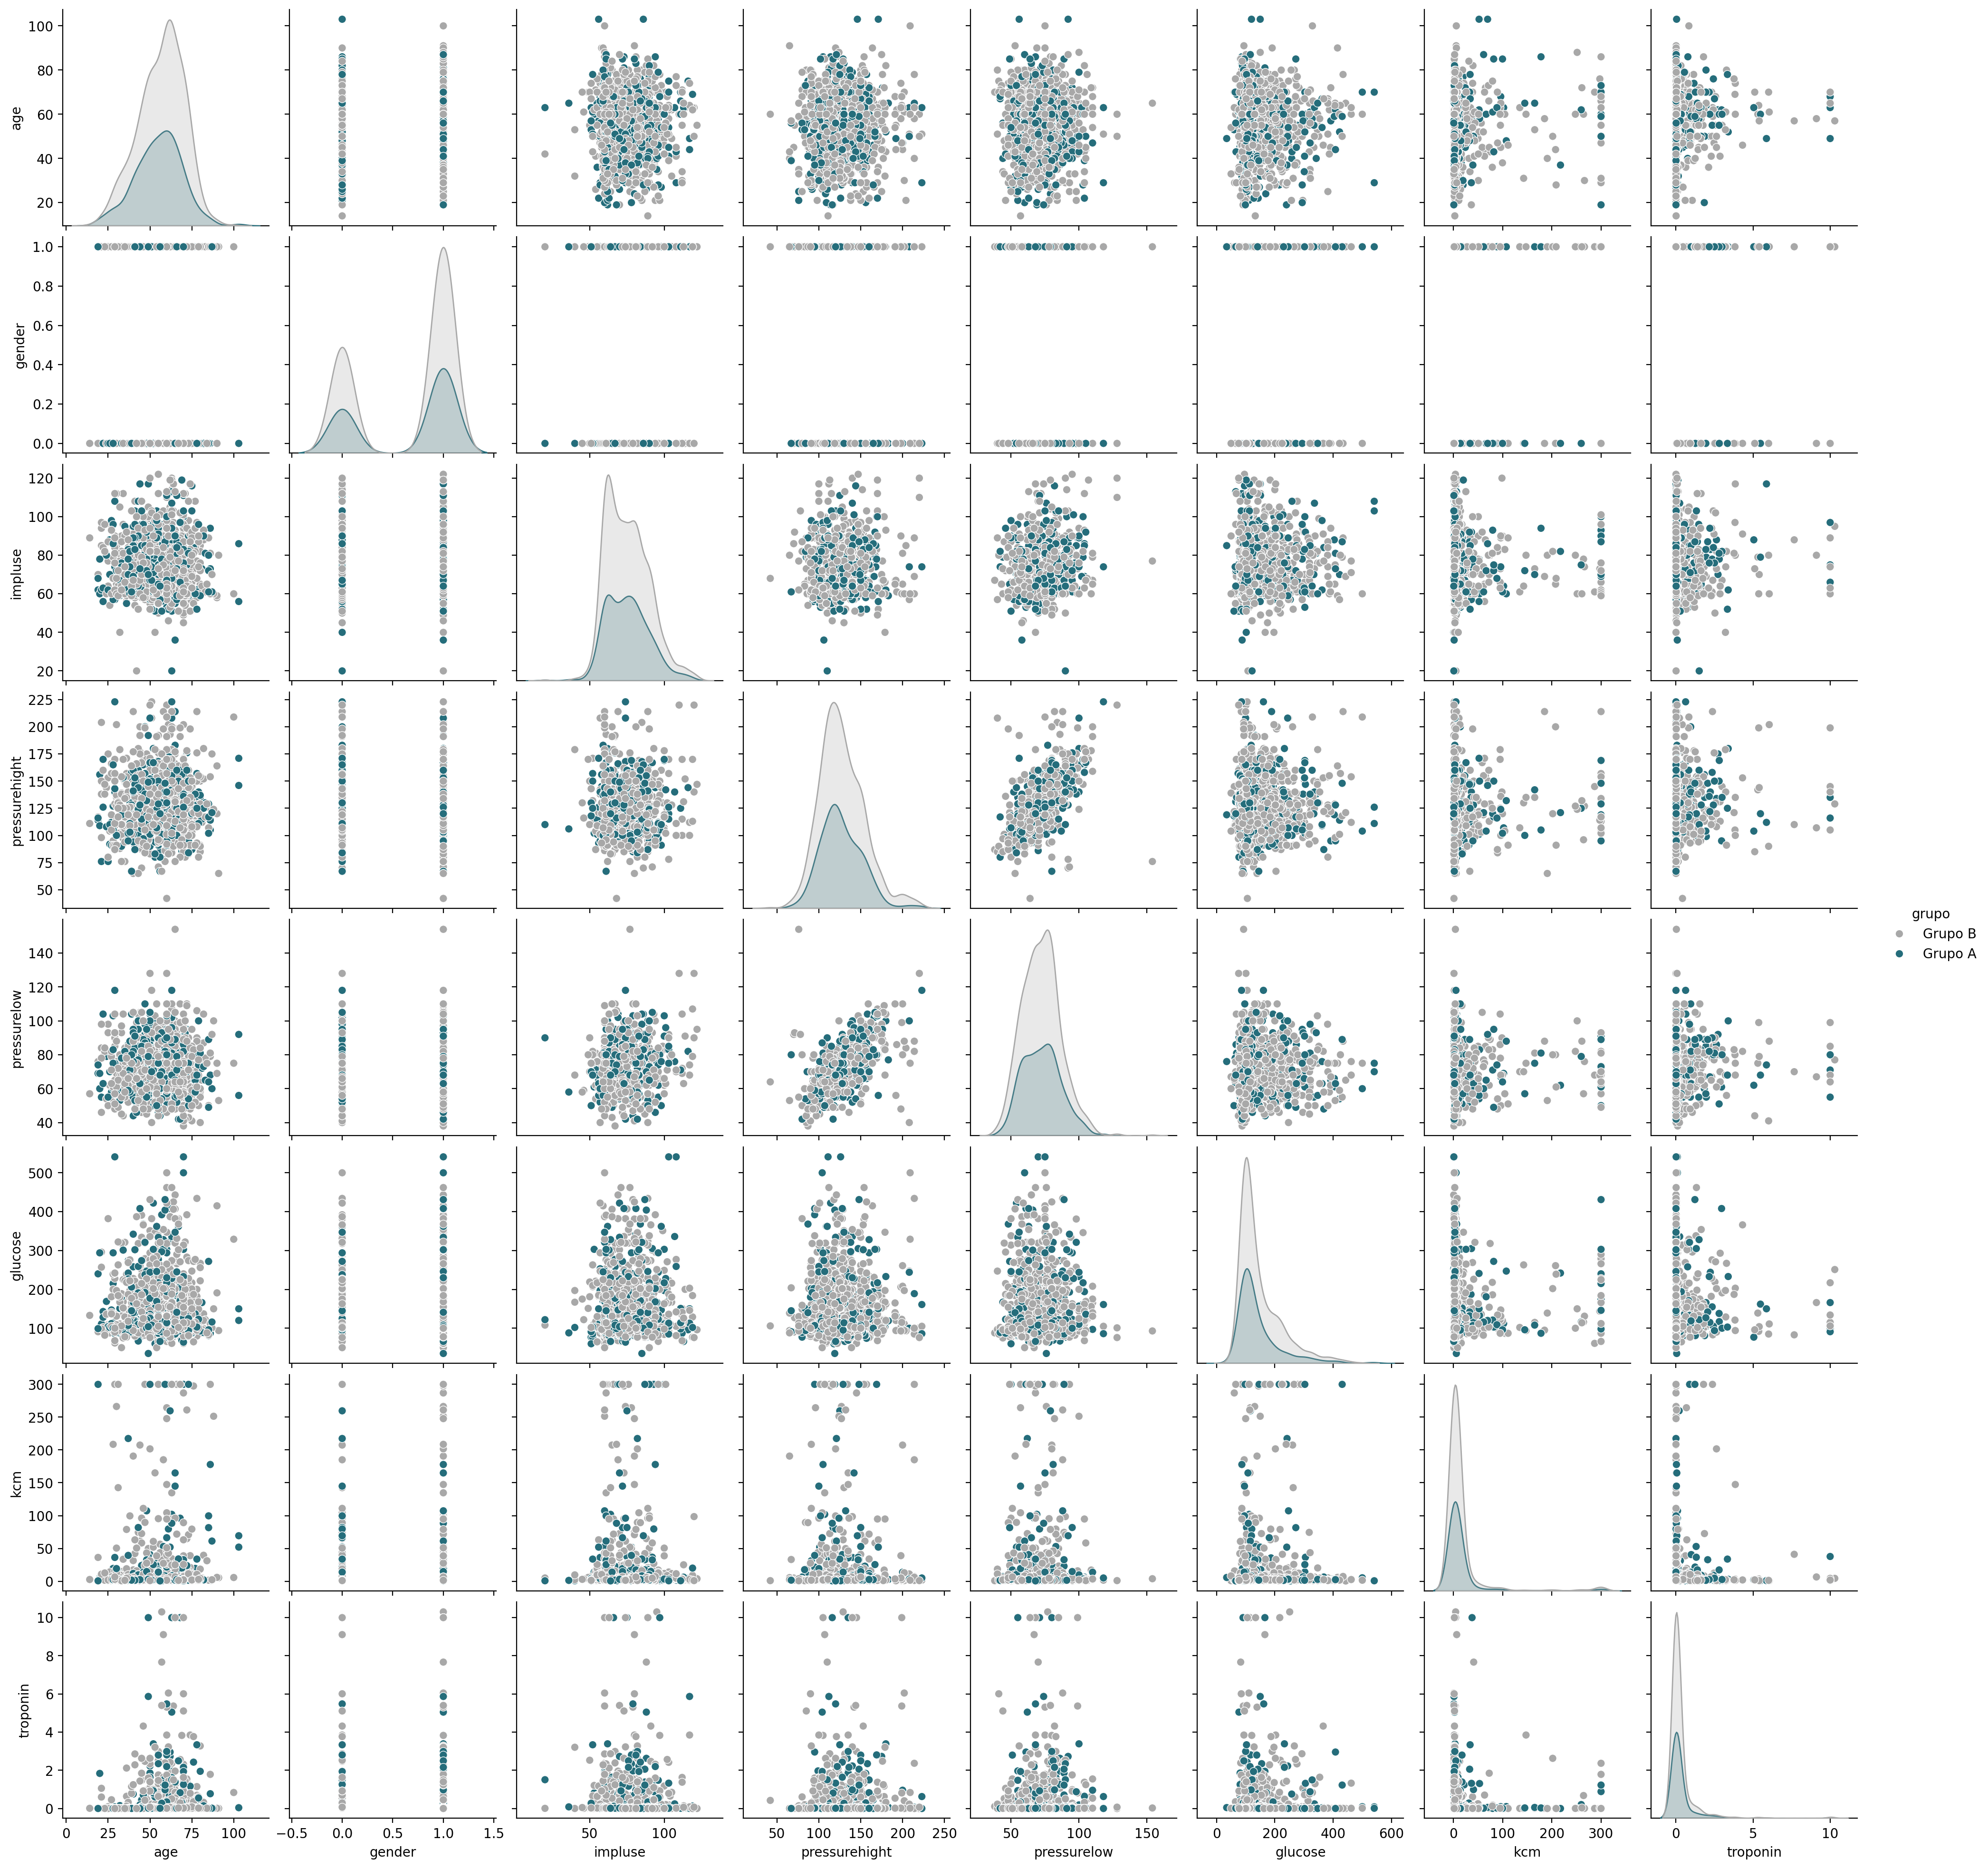

In [29]:
sns.pairplot(data[columns+['grupo']], hue='grupo', palette=["#A8A8A8", '#256D7B'])
plt.show()

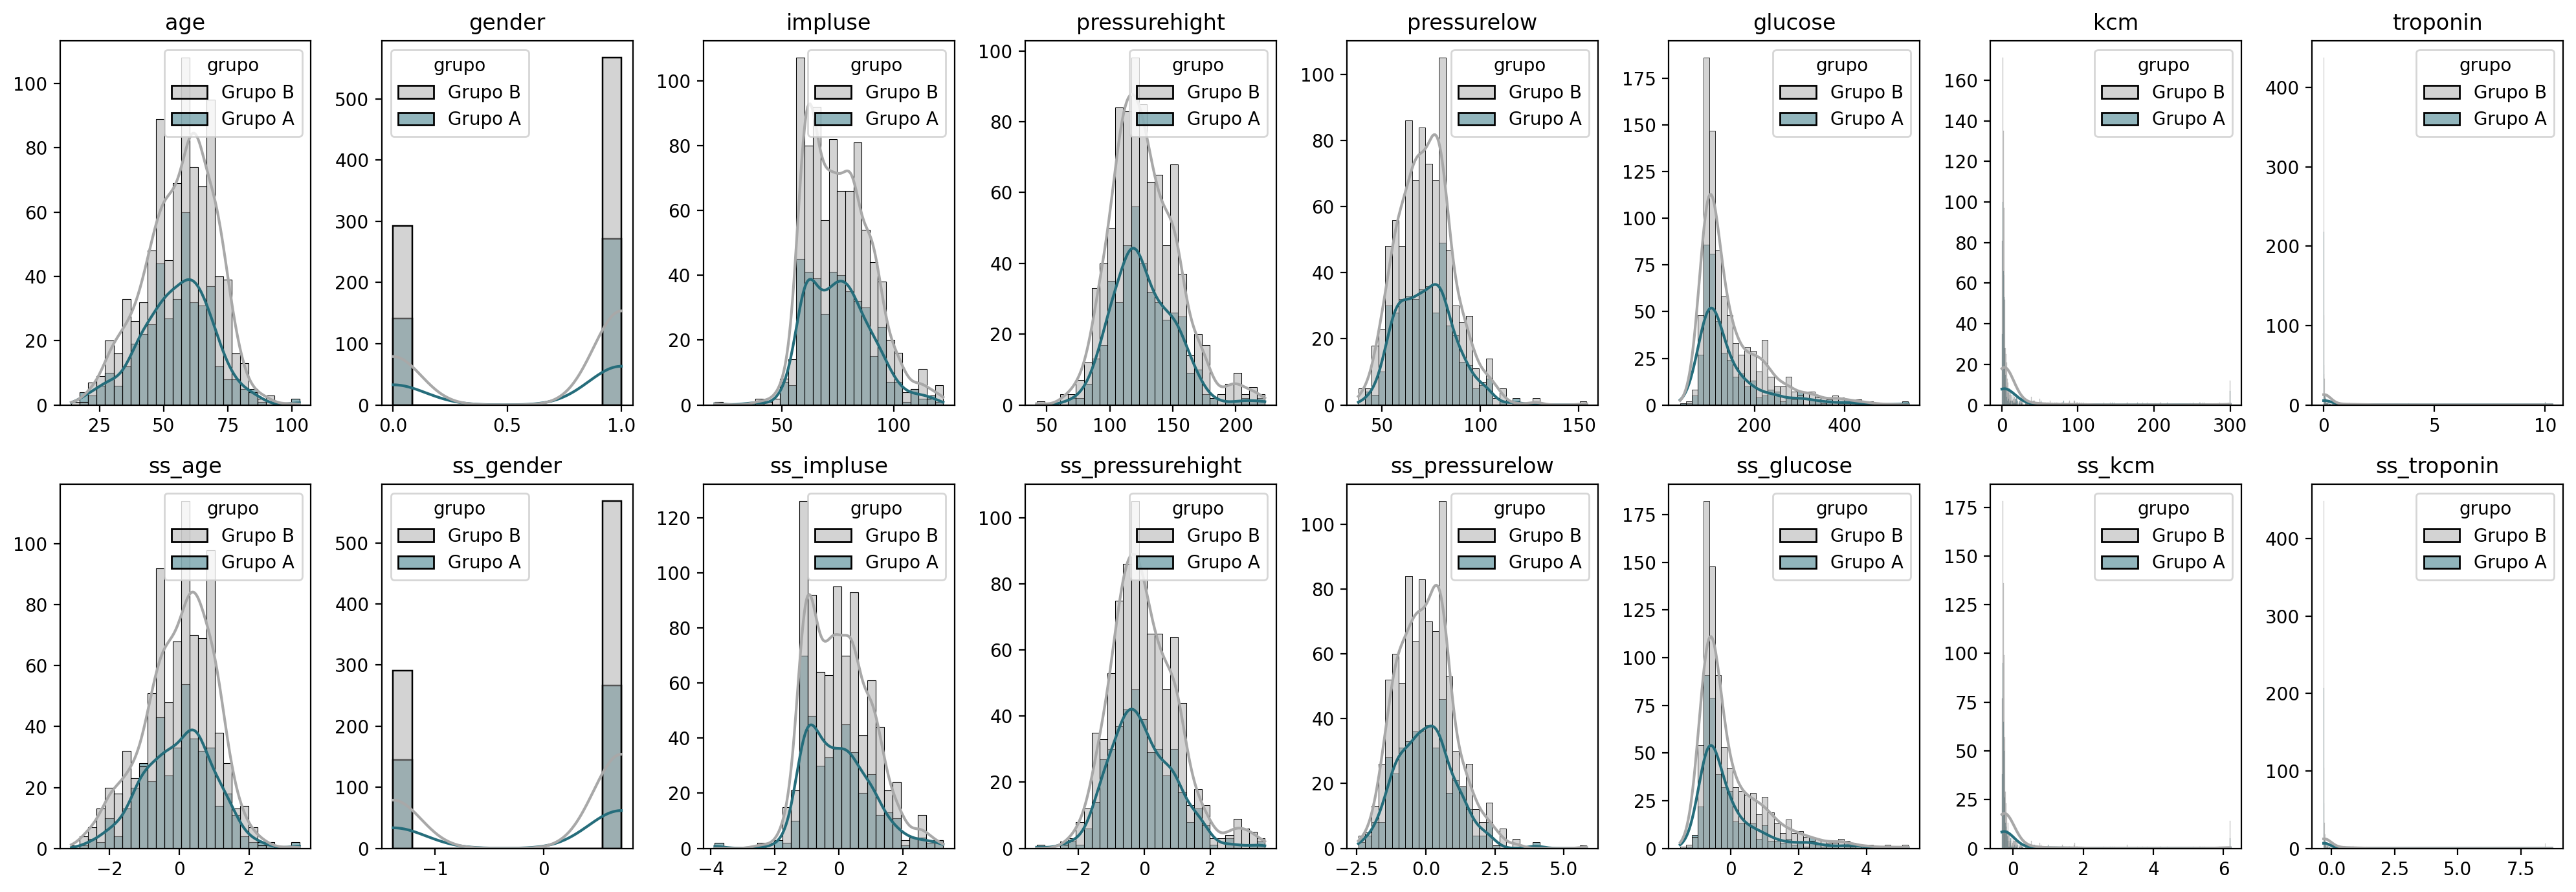

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes hasta 8 variables en var_disc
fig, axes = plt.subplots(2, 8, figsize=(20, 7))  # 4 filas, 2 columnas
axes = axes.flatten()  # Para poder iterar fácilmente

# Iteramos sobre las variables y ejes
for i, var in enumerate(data.columns):
    if i >= 16:  # Por si hay más de 8 variables, ignora el resto
        break
    ax = axes[i]
    sns.histplot(data=data, x=var, hue='grupo', kde=True, ax=ax, palette=["#A8A8A8", '#256D7B'])
    #listings[var].value_counts().plot(kind='bar', color='#256D7B', ax=ax)
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [31]:
data.head()

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  troponin  \
0   64       1       66            160           83    160.0   1.80     0.012   
1   21       1       94             98           46    296.0   6.75     1.060   
2   55       1       64            160           77    270.0   1.99     0.003   
3   64       1       70            120           55    270.0  13.87     0.122   
4   55       1       64            112           65    300.0   1.08     0.003   

     ss_age  ss_gender  ss_impluse  ss_pressurehight  ss_pressurelow  \
0  0.574898   0.720172   -0.659096          1.249002        0.764077   
1 -2.581802   0.720172    1.297172         -1.117809       -1.870518   
2 -0.085807   0.720172   -0.798829          1.249002        0.336845   
3  0.574898   0.720172   -0.379629         -0.277973       -1.229670   
4 -0.085807   0.720172   -0.798829         -0.583368       -0.517618   

   ss_glucose    ss_kcm  ss_troponin     comp1     comp2    grupo  
0    0.173196 -0.289397    -0.302130 -1.622491  0.182173  Grupo B  
1    1.981645 -0.181892     0.618067  3.513378  2.485057  Grupo B  
2    1.635912 -0.285271    -0.310032 -1.568859  1.509334  Grupo B  
3    1.635912 -0.027258    -0.205544  1.932382  0.991198  Grupo B  
4    2.034835 -0.305034    -0.310032  1.827860  1.495541  Grupo B

In [32]:
data.groupby('grupo').agg(['min', 'max'])

age      gender     impluse      pressurehight      pressurelow       \
        min  max    min max     min  max           min  max         min  max   
grupo                                                                          
Grupo A  19  103      0   1      20  119            67  223          42  118   
Grupo B  14  100      0   1      20  122            42  223          38  154   

         ... ss_glucose              ss_kcm           ss_troponin            \
         ...        min       max       min       max         min       max   
grupo    ...                                                                  
Grupo A  ...  -1.289520  3.776797 -0.320824  6.186992   -0.311788  8.467840   
Grupo B  ...  -1.488982  5.239514 -0.321519  6.186992   -0.310910  8.731255   

            comp1               comp2            
              min       max       min       max  
grupo                                            
Grupo A -6.349852  8.805237 -6.986048 -1.005142  
Grupo B -6.878737  9.223979 -0.994108  9.095056  

[2 rows x 36 columns]